In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
%matplotlib inline

In [3]:
df = pd.read_csv('merged_dataset.csv')

In [4]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual', 'Lower Confidence Interval',
       'Upper Confidence Interval', 'Happiness.Rank', 'Happiness.Score',
       'Whisker.high', 'Whisker.low', 'Economy..GDP.per.Capita.',
       'Health..Life.Expectancy.', 'Trust..Government.Corruption.',
       'Dystopia.Residual', 'Overall rank', 'Country or region', 'Score',
       'GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Perceptions of corruption'],
      dtype='object')

In [5]:
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),...,Trust..Government.Corruption.,Dystopia.Residual,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption
0,Switzerland,Western Europe,1.0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Iceland,Western Europe,2.0,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Denmark,Western Europe,3.0,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Norway,Western Europe,4.0,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Canada,North America,5.0,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
import pandas as pd

# Load your dataset into a DataFrame (replace 'data.csv' with your actual dataset)
# Assuming NaN values are represented as empty strings in the CSV file
df = pd.read_csv('merged_dataset.csv', na_values='', delimiter=',')

# Replace NaN values with the mean of each column (for numeric columns)
numeric_columns = df.select_dtypes(include='number').columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

# Display the first few rows of the DataFrame after handling NaN values
print(df.head())


       Country          Region  Happiness Rank  Happiness Score  \
0  Switzerland  Western Europe             1.0            7.587   
1      Iceland  Western Europe             2.0            7.561   
2      Denmark  Western Europe             3.0            7.527   
3       Norway  Western Europe             4.0            7.522   
4       Canada   North America             5.0            7.427   

   Standard Error  Economy (GDP per Capita)   Family  \
0         0.03411                   1.39651  1.34951   
1         0.04884                   1.30232  1.40223   
2         0.03328                   1.32548  1.36058   
3         0.03880                   1.45900  1.33095   
4         0.03553                   1.32629  1.32261   

   Health (Life Expectancy)  Freedom  Trust (Government Corruption)  ...  \
0                   0.94143  0.66557                        0.41978  ...   
1                   0.94784  0.62877                        0.14145  ...   
2                   0.87464  0.6

In [7]:
df.shape

(782, 30)

In [8]:
# Check for missing values

df.isnull().sum()

#missing values do not represent catagories that we are using for analysis - Proceeding as is.

Country                          312
Region                           467
Happiness Rank                     0
Happiness Score                    0
Standard Error                     0
Economy (GDP per Capita)           0
Family                             0
Health (Life Expectancy)           0
Freedom                            0
Trust (Government Corruption)      0
Generosity                         0
Dystopia Residual                  0
Lower Confidence Interval          0
Upper Confidence Interval          0
Happiness.Rank                     0
Happiness.Score                    0
Whisker.high                       0
Whisker.low                        0
Economy..GDP.per.Capita.           0
Health..Life.Expectancy.           0
Trust..Government.Corruption.      0
Dystopia.Residual                  0
Overall rank                       0
Country or region                470
Score                              0
GDP per capita                     0
Social support                     0
H

In [9]:
dups = df.duplicated()
dups.shape

# No duplicates present

(782,)

C:\Users\vrich\AppData\Local\Temp\ipykernel_13688\2243674596.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Score'], bins=25)
C:\Users\vrich\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


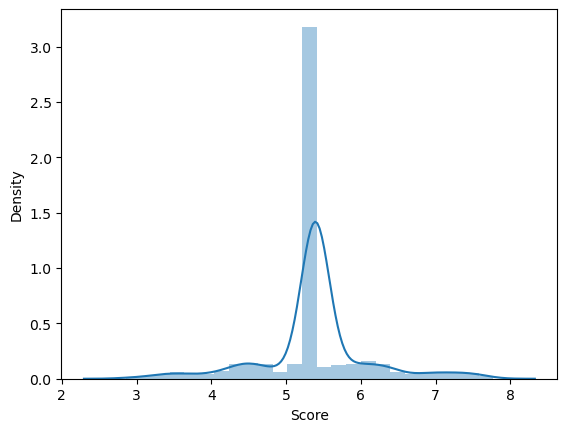

In [10]:
# Assuming df is your DataFrame
sns.distplot(df['Score'], bins=25)
plt.show()


In [11]:
df['Score'].mean() # Check the mean

5.391506410256411

In [12]:
df['Score'].median()


5.39150641025641

In [13]:
df['Score'].max()

7.769

In [14]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['Social support'].values.reshape(-1,1)
y = df['Score'].values.reshape(-1,1)

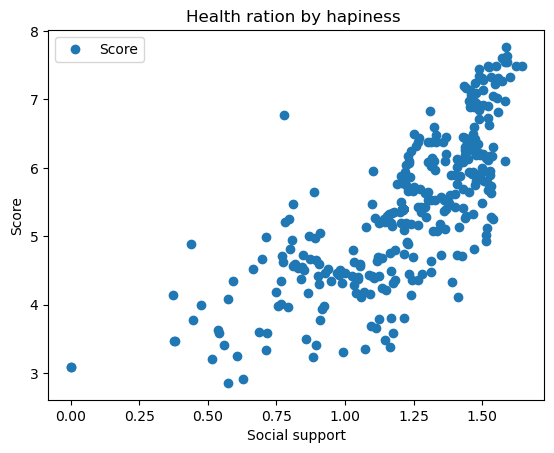

In [15]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'Social support', y='Score',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Socila support vs  Score ')  
plt.xlabel('Social support')  
plt.ylabel('Score')  
plt.show()


In [16]:
X

array([[1.21102564],
       [1.21102564],
       [1.21102564],
       [1.21102564],
       [1.21102564],
       [1.21102564],
       [1.21102564],
       [1.21102564],
       [1.21102564],
       [1.21102564],
       [1.21102564],
       [1.21102564],
       [1.21102564],
       [1.21102564],
       [1.21102564],
       [1.21102564],
       [1.21102564],
       [1.21102564],
       [1.21102564],
       [1.21102564],
       [1.21102564],
       [1.21102564],
       [1.21102564],
       [1.21102564],
       [1.21102564],
       [1.21102564],
       [1.21102564],
       [1.21102564],
       [1.21102564],
       [1.21102564],
       [1.21102564],
       [1.21102564],
       [1.21102564],
       [1.21102564],
       [1.21102564],
       [1.21102564],
       [1.21102564],
       [1.21102564],
       [1.21102564],
       [1.21102564],
       [1.21102564],
       [1.21102564],
       [1.21102564],
       [1.21102564],
       [1.21102564],
       [1.21102564],
       [1.21102564],
       [1.211

In [17]:
y

array([[5.39150641],
       [5.39150641],
       [5.39150641],
       [5.39150641],
       [5.39150641],
       [5.39150641],
       [5.39150641],
       [5.39150641],
       [5.39150641],
       [5.39150641],
       [5.39150641],
       [5.39150641],
       [5.39150641],
       [5.39150641],
       [5.39150641],
       [5.39150641],
       [5.39150641],
       [5.39150641],
       [5.39150641],
       [5.39150641],
       [5.39150641],
       [5.39150641],
       [5.39150641],
       [5.39150641],
       [5.39150641],
       [5.39150641],
       [5.39150641],
       [5.39150641],
       [5.39150641],
       [5.39150641],
       [5.39150641],
       [5.39150641],
       [5.39150641],
       [5.39150641],
       [5.39150641],
       [5.39150641],
       [5.39150641],
       [5.39150641],
       [5.39150641],
       [5.39150641],
       [5.39150641],
       [5.39150641],
       [5.39150641],
       [5.39150641],
       [5.39150641],
       [5.39150641],
       [5.39150641],
       [5.391

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [19]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [20]:
regression.fit(X_train, y_train)  # Fit the regression object onto the training set.

LinearRegression()

In [21]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

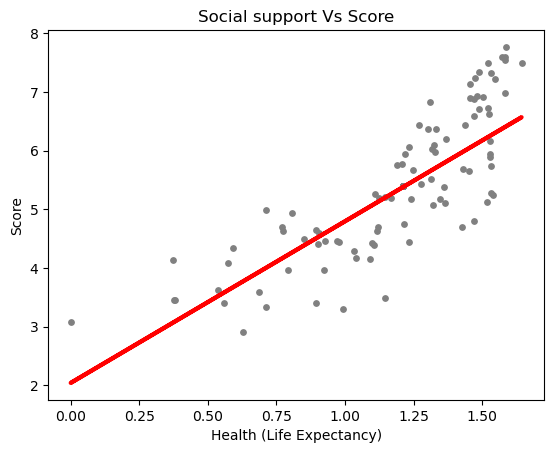

In [22]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Social support Vs Score')
plot_test.xlabel('Social support')
plot_test.ylabel('Score')
plot_test.show()

In [23]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [24]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[2.75478414]]
Mean squared error:  0.2116754286193453
R2 score:  0.658811111119557


In [25]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,5.391506,5.378337
1,6.886000,6.094510
2,5.391506,5.378337
3,5.391506,5.378337
4,5.391506,5.378337
5,5.391506,5.378337
6,4.390000,5.086259
7,5.391506,5.378337
8,5.391506,5.378337
9,5.391506,5.378337


In [26]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [27]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [28]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[2.75478414]]
Mean squared error:  0.20677196774448464
R2 score:  0.5298853113861623


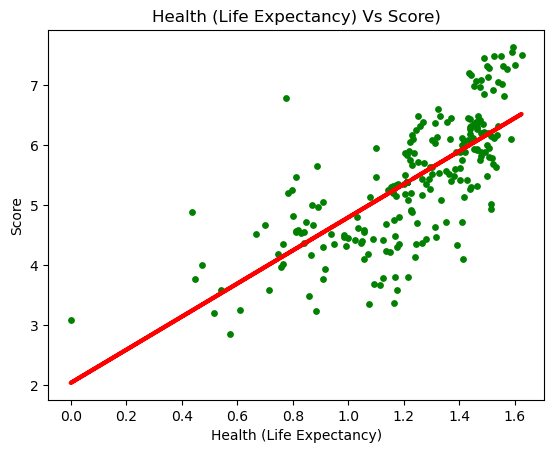

In [29]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Health (Life Expectancy) Vs Score)')
plot_test.xlabel('Health (Life Expectancy)')
plot_test.ylabel('Score')
plot_test.show()

C:\Users\vrich\AppData\Local\Temp\ipykernel_13688\1560109889.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Score'], bins=100) # Shows extreme values
C:\Users\vrich\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Score', ylabel='Density'>

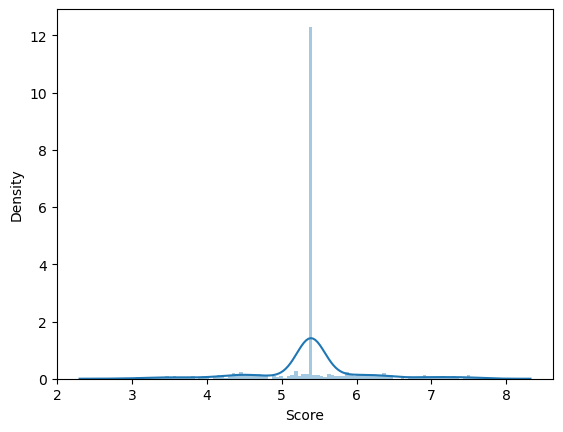

In [33]:
sns.distplot(df['Score'], bins=100) # Shows extreme values

In [34]:
df['Score'].describe()

count    782.000000
mean       5.391506
std        0.703373
min        2.853000
25%        5.391506
50%        5.391506
75%        5.391506
max        7.769000
Name: Score, dtype: float64

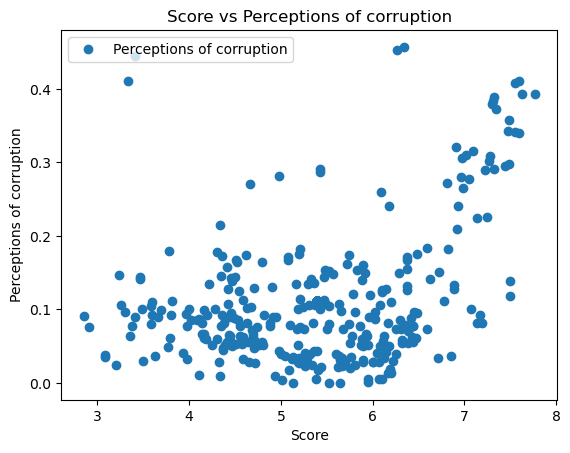

In [35]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'Score', y='Perceptions of corruption',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Score vs Perceptions of corruption')  
plt.xlabel('Score')  
plt.ylabel('Perceptions of corruption')  
plt.show()

In [36]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X2 = df['Score'].values.reshape(-1,1)
y2 = df['Perceptions of corruption'].values.reshape(-1,1)

In [37]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.3, random_state=0)

In [38]:
#rerunning and fitting the regression:
egression = LinearRegression()
regression.fit(X_train2, y_train2)

LinearRegression()

In [39]:
# Predict.

y_predicted2 = regression.predict(X_test2)

In [41]:
rmse = mean_squared_error(y_test2, y_predicted2)
r2 = r2_score(y_test2, y_predicted2)

In [42]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.03539039]]
Mean squared error:  0.0037914127362649467
R2 score:  0.10348422484617503


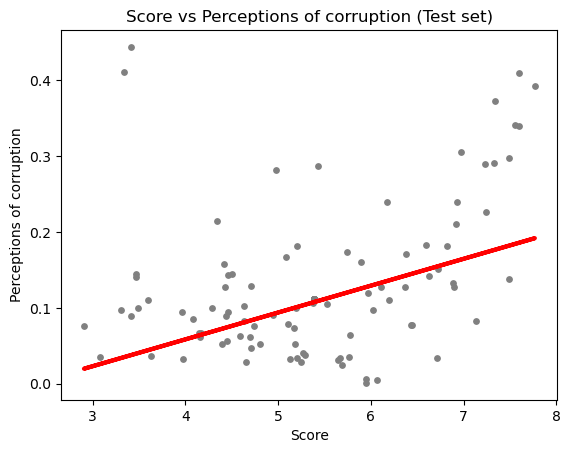

In [43]:
# Visualizing the test set results.
plot_test = plt
plot_test.scatter(X_test2, y_test2, color='gray', s = 15)
plot_test.plot(X_test2, y_predicted2, color='red', linewidth =3)
plot_test.title('Score vs Perceptions of corruption (Test set)')
plot_test.xlabel('Score')
plot_test.ylabel('Perceptions of corruption')
plot_test.show()

In [ ]:
#Hypothesis values i get here in prediction little bit same .

In [44]:
# Create objects for model mean squared error and R2 score

rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [45]:
# Print the model summary statistics

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.03539039]]
Mean squared error:  0.2116754286193453
R2 score:  0.658811111119557


In [ ]:
### results 
The second set of metrics shows worse performance than the first set, possibly due to differences in datasets, potential overfitting, or underfitting. Data bias, selection bias, measurement bias, and overfitting/underfitting can impact performance. Ensure diverse and accurate datasets and consistent data collection processes.

In [46]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,5.391506,5.378337
1,6.886000,6.094510
2,5.391506,5.378337
3,5.391506,5.378337
4,5.391506,5.378337
5,5.391506,5.378337
6,4.390000,5.086259
7,5.391506,5.378337
8,5.391506,5.378337
9,5.391506,5.378337


In [ ]:
##### Explanation 
## The model's low Mean Absolute Error and Root Mean Squared Error suggest close predictions, but a narrow range of values around 5.392774 suggests potential data bias.The model's narrow range of predictions suggests potential bias, possibly due to the training data not being representative of the entire population. This could result from selection bias, measurement bias, or overfitting. Selection bias occurs when the training data is not randomly selected or skewed towards certain values, while measurement bias occurs when inconsistencies or errors in recording 'Actual' values lead to inaccurate predictions. Overfitting can occur when the training set is small or has limited variability. To mitigate biases, ensure the training data is comprehensive and representative of real-world scenarios, and use techniques like cross-validation, regularization, and diverse, high-quality data to improve the model's performance and generalizability.

In [47]:
#check shape before export
df.shape

(782, 30)